In [3]:
####################################################################################
# Code produced by Ayden McCarthy
# Manuscript Title: "Strength, Jump Height, Landing, and Mobility
#                    Characteristics Predicts High and Low Performers of a 
#                    Military Fire and Move Assessment: A Machine Learning Approach
# Program of Study: PhD Candidate
# Institution: Macquarie University
# Year: 2025
####################################################################################

####################################################################################
# Note for Users:
# This code is intended for use within Python JupyterLab.
# It requires data to be set up according to the instructions 
# outlined in the manuscript and within this script. Users can follow the code comments to 
# understand each step of the analysis.
# Please ensure that you replace the placeholder CSV file names in 
# the code with the names of your specific data files to run the code 
# successfully.
####################################################################################

In [4]:
import pandas as pd

# Load training data
# Note: Score is the fire and movement assement score for the individual. Please adjust accordingly or alternatively add your scores to this coloumn.
df = pd.read_csv("EFA_Values.csv")

# Categorise participants into 'High' (50 Laps) and 'Low' (49 laps or lower) based on Scores (or the users scores)
df['Performance_Group'] = df['Score'].apply(lambda x: 'High' if x >= 49 else 'Low')

# Reorder columns to place Performance_Group next to Score
columns_order = ['Score', 'Performance_Group'] + [col for col in df.columns if col not in ['Score', 'Performance_Group']]
df = df[columns_order]

# Sort rows by Performance_Group: High, Low
performance_order = ['High', 'Low']
df['Performance_Group'] = pd.Categorical(df['Performance_Group'], categories=performance_order, ordered=True)
df = df.sort_values('Performance_Group')

# Save the updated dataset to a new CSV file
df.to_csv("Dataset_with_Performance_Groups.csv", index=False)

# Calculate descriptive statistics for each performance group
descriptive_stats = df.groupby('Performance_Group')['Score'].describe()

# Calculate the range for each performance group
range_stats = df.groupby('Performance_Group')['Score'].apply(lambda x: x.max() - x.min()).reset_index()
range_stats.columns = ['Performance_Group', 'range']

# Merge the descriptive statistics with the range
full_stats = pd.merge(descriptive_stats, range_stats, on='Performance_Group')

# Save the statistics to a new CSV file
full_stats.to_csv("Performance_Group_Descriptive_Statistics.csv", index=False)

# Display the table
print("Descriptive Statistics for Each Performance Group:")
print(full_stats)

Descriptive Statistics for Each Performance Group:
  Performance_Group  count       mean        std   min    25%   50%   75%  \
0              High   16.0  50.000000   0.000000  50.0  50.00  50.0  50.0   
1               Low   18.0  18.944444  14.570204   1.0   3.25  20.5  30.5   

    max  range  
0  50.0      0  
1  40.0     39  


C:\Users\ayden\AppData\Local\Temp\ipykernel_52744\1554361059.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats = df.groupby('Performance_Group')['Score'].describe()
C:\Users\ayden\AppData\Local\Temp\ipykernel_52744\1554361059.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_stats = df.groupby('Performance_Group')['Score'].apply(lambda x: x.max() - x.min()).reset_index()


C:\Users\ayden\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
26541 fits failed out of a total of 54000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4482 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ayden\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ayden\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ayden\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    so

Best Parameters: {'C': 0.5596635349987567, 'l1_ratio': 0.2201196891393793, 'max_iter': 1455, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy: 0.8888888888888888
Testing Accuracy: 1.0
Training Precision: 0.8125
Testing Precision: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training Confusion Matrix:
[[11  3]
 [ 0 13]]
Testing Confusion Matrix:
[[4 0]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



C:\Users\ayden\AppData\Local\Temp\ipykernel_52744\4003540435.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=coeff_importance_df, palette='coolwarm')


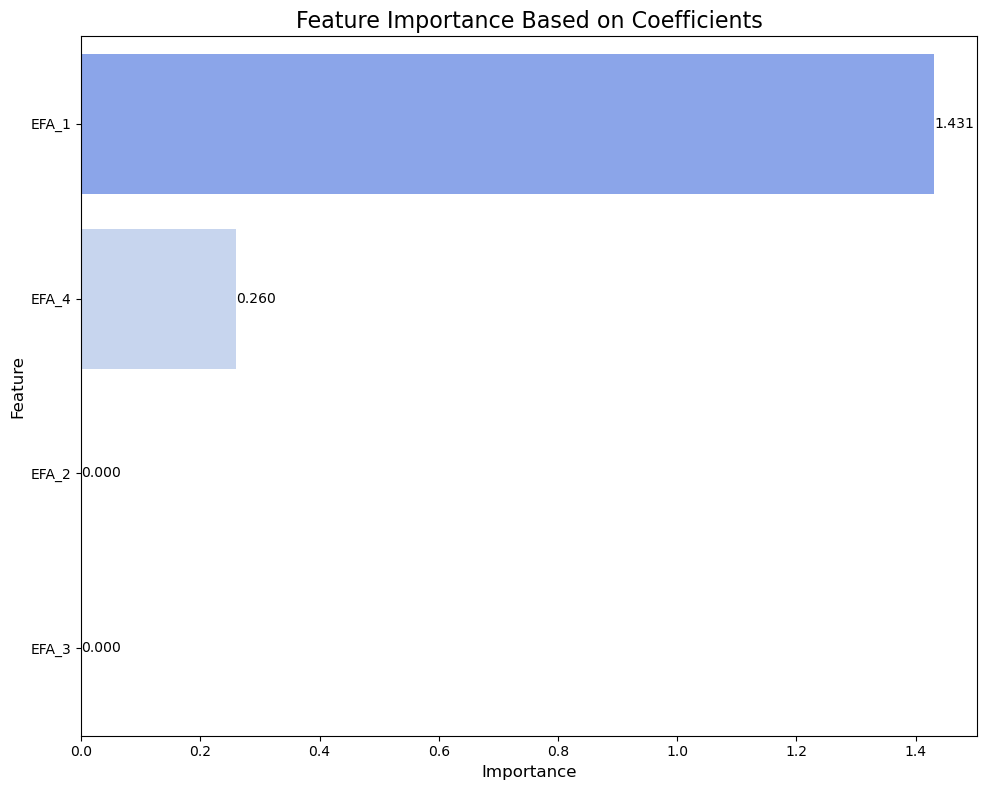

Permutation Importance Values:
  Feature  Importance
0   EFA_1    0.362463
3   EFA_4    0.062000
1   EFA_2    0.000000
2   EFA_3    0.000000


C:\Users\ayden\AppData\Local\Temp\ipykernel_52744\4003540435.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')


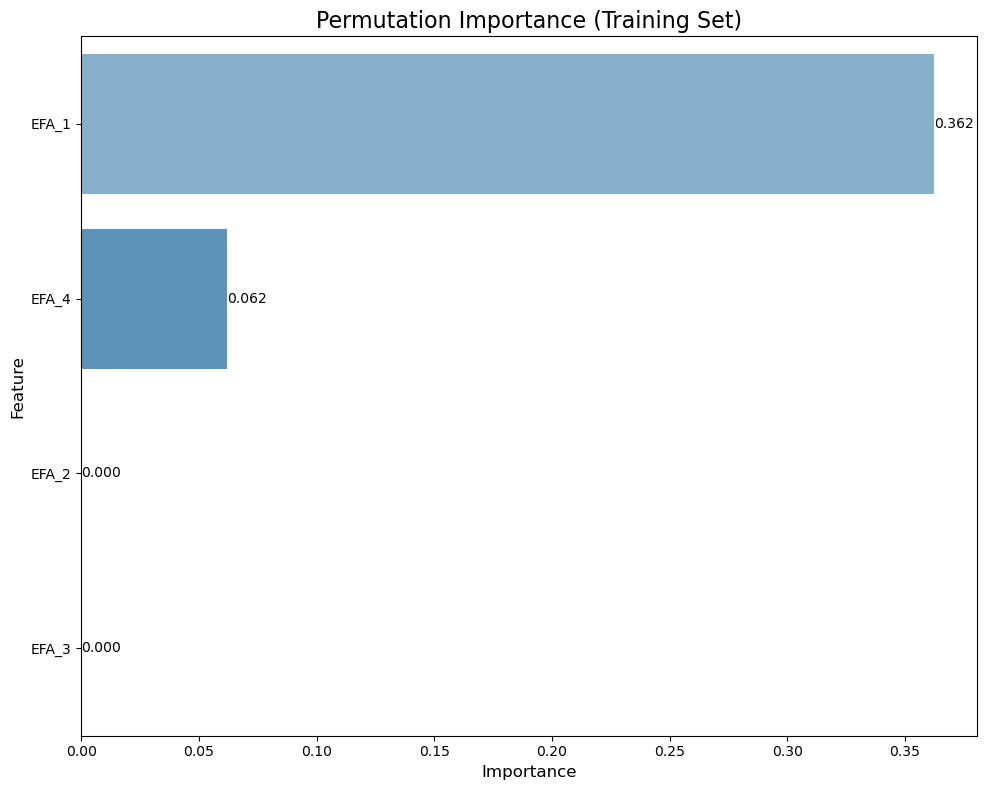

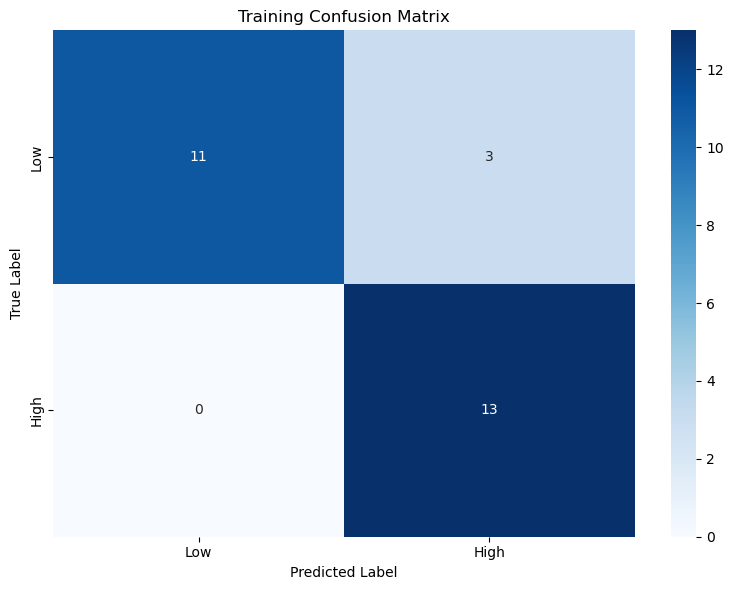

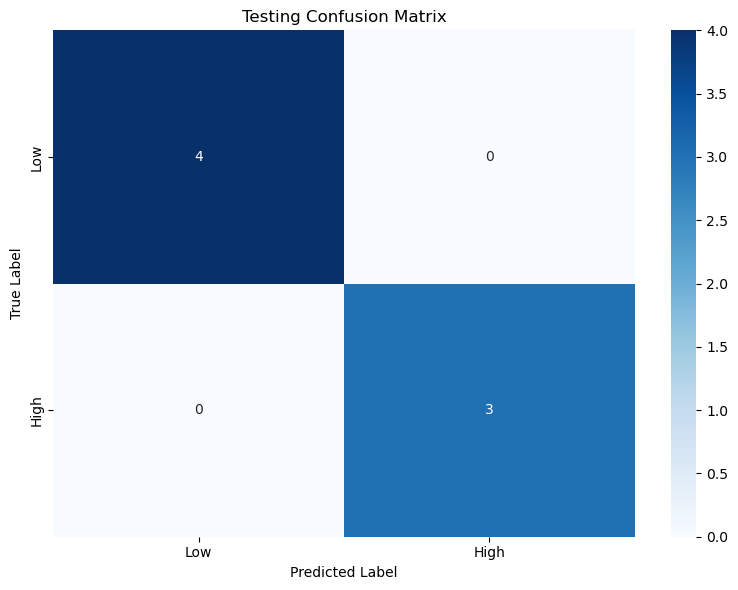

T-Test Results (Independent T-Test):
  Feature  High Mean  High Std  Low Mean   Low Std  t-statistic       p-value
0   EFA_1   0.777141  0.537859 -0.690792  0.789002     6.396517  4.560305e-07
2   EFA_3   0.443670  1.122072 -0.394373  0.939494     2.344910  2.597787e-02
1   EFA_2   0.398854  1.128783 -0.354537  0.817322     2.204950  3.614180e-02
3   EFA_4   0.357147  0.574841 -0.317464  1.173729     2.163949  4.009521e-02


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("EFA_Values.csv")

# Categorise participants into 'High' (50 Laps) and 'Low' (49 laps or lower) based on Scores (or the users scores)
df['Performance_Group'] = df['Score'].apply(lambda x: 'High' if x >= 49 else 'Low')

# Reorder columns to place Performance_Group next to Score
columns_order = ['Score', 'Performance_Group'] + [col for col in df.columns if col not in ['Score', 'Performance_Group']]
df = df[columns_order]

# Encode the target variable
df['Performance_Group'] = df['Performance_Group'].map({'High': 1, 'Low': 0})

# Select features and target variable
features = df.drop(columns=['Performance_Group', 'Score'])
target = df['Performance_Group']

# Split the dataset into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=34)

# Standardise the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Define a logistic regression model
log_reg = LogisticRegression(random_state=34)

# Define a parameter distribution to randomly sample from
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Different penalty types
    'C': stats.uniform(0.01, 100),  # Uniform distribution of C from 0.01 to 100
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Different solvers
    'max_iter': stats.randint(100, 2000),  # Random integer for max_iter between 100 and 2000
    'l1_ratio': stats.uniform(0, 1)  # Only relevant for elasticnet
}

# Set up RandomisedSearchCV with Leave-One-Out CV
random_search = RandomizedSearchCV(
    log_reg,  # Logistic regression model
    param_distributions=param_dist,  # Distributions of parameters
    n_iter=2000,  # Number of random samples to draw
    cv=LeaveOneOut(),  # Leave-One-Out cross-validation
    scoring='accuracy',  # Scoring metric
    random_state=34,  # Ensure reproducibility
    verbose=0,  # Print progress
    n_jobs=-1  # Use all cores
)

# Fit the randomised search to the training data
random_search.fit(train_features_scaled, train_target)

# Get the best model and parameters
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# Make predictions using the best model
train_predictions = best_model.predict(train_features_scaled)
test_predictions = best_model.predict(test_features_scaled)

# Evaluate the model
train_accuracy = accuracy_score(train_target, train_predictions)
test_accuracy = accuracy_score(test_target, test_predictions)
train_precision = precision_score(train_target, train_predictions)
test_precision = precision_score(test_target, test_predictions)
train_recall = recall_score(train_target, train_predictions)
test_recall = recall_score(test_target, test_predictions)
train_conf_matrix = confusion_matrix(train_target, train_predictions)
test_conf_matrix = confusion_matrix(test_target, test_predictions)
class_report = classification_report(test_target, test_predictions)

# Save the predictions to a CSV file including true outcome values and LP_Weight Lifted (Kg)
test_features['True_Performance_Group'] = test_target.values
test_features['Predicted_Performance_Group'] = test_predictions
test_features['Score'] = df.loc[test_features.index, 'Score'].values
test_features.to_csv("Test_Set_Predictions_Log.csv", index=False)

train_features['True_Performance_Group'] = train_target.values
train_features['Predicted_Performance_Group'] = train_predictions
train_features['Score'] = df.loc[train_features.index, 'Score'].values
train_features.to_csv("Training_Set_Predictions_Log.csv", index=False)

# Display the results
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Testing Precision: {test_precision}")
print(f"Training Recall: {train_recall}")
print(f"Testing Recall: {test_recall}")
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("Testing Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(class_report)

# Save the classification report to a text file
with open("Classification_Report_Log.txt", "w") as f:
    f.write(f"Training Accuracy: {train_accuracy}\n")
    f.write(f"Testing Accuracy: {test_accuracy}\n")
    f.write(f"Training Precision: {train_precision}\n")
    f.write(f"Testing Precision: {test_precision}\n")
    f.write(f"Training Recall: {train_recall}\n")
    f.write(f"Testing Recall: {test_recall}\n")
    f.write("Training Confusion Matrix:\n")
    f.write(np.array2string(train_conf_matrix))
    f.write("\nTesting Confusion Matrix:\n")
    f.write(np.array2string(test_conf_matrix))
    f.write("\nClassification Report:\n")
    f.write(class_report)

# Save classification metrics and confusion matrices to CSV
metrics_data = {
    'Metric': ['Training Accuracy', 'Testing Accuracy', 'Training Precision', 'Testing Precision', 
               'Training Recall', 'Testing Recall'],
    'Value': [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
}

# Convert classification metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Save the metrics DataFrame to a CSV file
metrics_df.to_csv("Classification_Metrics_Log.csv", index=False)

# Convert confusion matrices into DataFrame for saving to CSV
train_conf_matrix_df = pd.DataFrame(train_conf_matrix, columns=['Predicted_Low', 'Predicted_High'], index=['Actual_Low', 'Actual_High'])
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, columns=['Predicted_Low', 'Predicted_High'], index=['Actual_Low', 'Actual_High'])

# Save confusion matrices to CSV
train_conf_matrix_df.to_csv("Training_Confusion_Matrix_Log.csv")
test_conf_matrix_df.to_csv("Testing_Confusion_Matrix_Log.csv")

# Convert classification report to DataFrame for saving to CSV
# Split classification report into a DataFrame using pandas
classification_report_df = pd.DataFrame(classification_report(test_target, test_predictions, output_dict=True)).transpose()

# Save the classification report to CSV
classification_report_df.to_csv("Classification_Report_Log.csv", index=True)


# === Feature Importance (Coefficients) === #
# Feature importance using logistic regression coefficients
coefficients = np.abs(best_model.coef_[0])
feature_names = features.columns
coeff_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
coeff_importance_df = coeff_importance_df.sort_values(by='Importance', ascending=False)

# Plot coefficient-based feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=coeff_importance_df, palette='coolwarm')
plt.title('Feature Importance Based on Coefficients', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(coeff_importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.tight_layout()
plt.savefig("Coefficient_Importance_Log.png")
plt.show()

# === Permutation Importance === #
# Compute and plot permutation importance
perm_importance = permutation_importance(best_model, train_features_scaled, train_target, n_repeats=2000, random_state=34, n_jobs=-1)

# Create a DataFrame to display the permutation importance
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Print permutation importance values
print("Permutation Importance Values:")
print(importance_df)

# Plot and save permutation importance (enhanced with numbers)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title('Permutation Importance (Training Set)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.tight_layout()
plt.savefig("Permutation_Importance_LR.png")
plt.show()

# Plot and save training confusion matrix with numbers
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion Matrix')
plt.tight_layout()
plt.savefig("Training_Confusion_Matrix_Log.png")
plt.show()

# Plot and save testing confusion matrix with numbers
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Testing Confusion Matrix')
plt.tight_layout()
plt.savefig("Testing_Confusion_Matrix_Log.png")
plt.show()

# Perform t-tests for each feature and calculate means and standard deviations
t_test_results = []
for feature in features.columns:
    high_group = df[df['Performance_Group'] == 1][feature]
    low_group = df[df['Performance_Group'] == 0][feature]
    t_stat, p_value = ttest_ind(high_group, low_group, equal_var=False)
    high_mean = high_group.mean()
    low_mean = low_group.mean()
    high_std = high_group.std()
    low_std = low_group.std()
    t_test_results.append({'Feature': feature, 'High Mean': high_mean, 'High Std': high_std, 'Low Mean': low_mean, 'Low Std': low_std, 't-statistic': t_stat, 'p-value': p_value})

t_test_results_df = pd.DataFrame(t_test_results)
t_test_results_df = t_test_results_df.sort_values(by='p-value')

# Save t-test results to a CSV file with title
t_test_results_df.to_csv("T_Test_Results.csv", index=False)

# Display t-test results
print("T-Test Results (Independent T-Test):")
print(t_test_results_df)
